# Tornado trends in Tornado Alley

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

First, load the file `noaa_data_cleaned.csv` (from the "Data cleaning" notebook):

In [2]:
df = pd.read_csv('noaa_data_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df['Strength'] > 0]  # Drop those with zero strength
df.head()

,Year,State,Strength
0,1950,Oklahoma,3
1,1950,Texas,1
2,1950,Pennsylvania,2
3,1950,Pennsylvania,2
5,1950,Pennsylvania,1


Now focus on Tornado Alley.  According the [Wikipedia page](https://en.wikipedia.org/wiki/Tornado_Alley), the following states make up the Tornado alley:

In [3]:
tornado_alley =  ['Texas', 'Oklahoma', 'Kansas', 'Nebraska', 'Iowa', 'South Dakota']

In [4]:
g = df.groupby(['Year', 'State'])
df_overall = g.count().unstack().droplevel(0, axis=1)
df_overall = df_overall.fillna(0)
df_overall = df_overall[tornado_alley]
df_overall.head()

State,Texas,Oklahoma,Kansas,Nebraska,Iowa,South Dakota
Year,,,,,,
1950,19.0,24.0,27.0,5.0,4.0,1.0
1951,12.0,38.0,40.0,6.0,5.0,2.0
1952,10.0,18.0,15.0,10.0,5.0,1.0
1953,25.0,47.0,22.0,31.0,32.0,10.0
1954,68.0,55.0,46.0,16.0,19.0,16.0


Compute the 10-year rolling average for each state:

In [5]:
df_overall = df_overall.rolling(10).mean().dropna()
df_overall.head()

State,Texas,Oklahoma,Kansas,Nebraska,Iowa,South Dakota
Year,,,,,,
1959,44.9,44.5,33.8,21.0,11.9,6.9
1960,48.3,51.0,34.8,23.8,13.8,7.3
1961,56.1,52.9,33.6,23.8,14.7,8.3
1962,65.4,53.9,36.2,26.0,15.3,11.4
1963,67.2,52.3,35.5,24.2,13.4,10.8


Now repeat the same process after focusing on these selected states:

In [6]:
selected_states = [
    'Mississippi', 'Alabama', 'Arkansas', 'Missouri', 'Illinois', 'Indiana', 'Tennessee', 'Kentucky'
]
df_selected_states = g.count().unstack().droplevel(0, axis=1)
df_selected_states = df_selected_states.fillna(0)
df_selected_states = df_selected_states[selected_states]
df_selected_states = df_selected_states.rolling(10).mean().dropna()

Let's visualize the results:

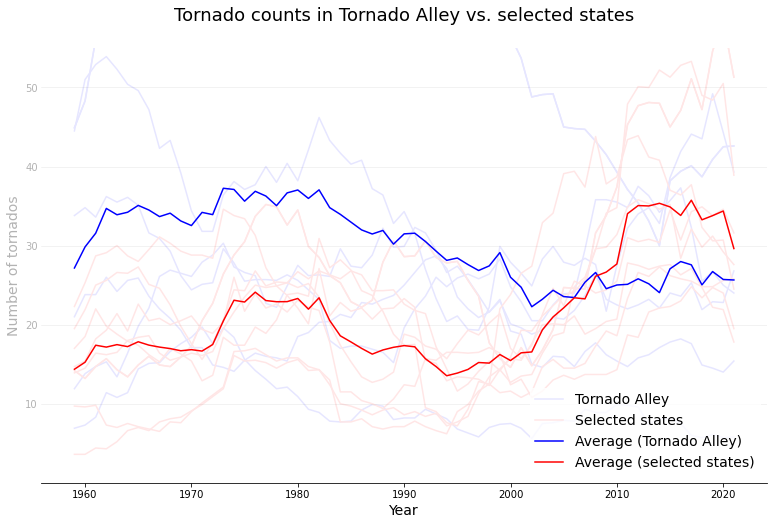

In [7]:
plt.figure(figsize=(13, 8))
plt.plot(df_overall.index, df_overall.iloc[:, 0], color=[0.9, 0.9, 1], label='Tornado Alley')
plt.plot(df_selected_states.index, df_selected_states.iloc[:, 0], color=[1, 0.9, 0.9], label='Selected states')
plt.plot(df_overall.index, df_overall, color=[0.9, 0.9, 1])
plt.plot(df_selected_states.index, df_selected_states, color=[1, 0.9, 0.9])
plt.plot(df_overall.index, df_overall.mean(axis=1), 'b-', label='Average (Tornado Alley)', alpha=1)
plt.plot(df_selected_states.index, df_selected_states.mean(axis=1), 'r-',
         label='Average (selected states)', alpha=1)
yticks = range(10, 51, 10)
plt.yticks(yticks)
for y in yticks:
    plt.axhline(y, linewidth=0.5, color='k', alpha=0.1)
ax = plt.gca()
ax.tick_params(axis='y', length=0)
for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
for text in ax.get_yticklabels():
    text.set_alpha(0.3)
plt.ylim([0, 55])
plt.title('Tornado counts in Tornado Alley vs. selected states\n', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of tornados', alpha=0.3, fontsize=14)
plt.legend(loc='lower right', fontsize=14, frameon=True, facecolor='white', edgecolor='white', framealpha=0.8)
plt.savefig('analysis_tornado_alley.png', format='png', facecolor='white')

We indeed see that the average number of tornadoes over the Tornado Alley states appears to be falling since around 1980 while the number has been increasing since around 2000 for the selected states.  